Using fire resistance values gathered from diablo, we use scipy curve fitting (least squares optimization) to fit a negative exponential function to the resistance values. Calculating the MSE we get a value of 0.1547 which suggests the fitted curve is accurate to the data. Therefore our model for Diablo 4's resistance values is $r(x)=-92.8e^{-0.011(x+37.234)}+60$ where $x$ is the resistance value from gear and $r(x)$ is the actual resistance value reported on the character sheet. Both of these values are measured as percentages.

These values were gathered from torment with a 40% resistance overcome modifier. Without this, the maximum reported resistance value is 97.8% from data, suggesting that 100% is the maximum and therefore 60% is the maximum in torment. We drop the parameter d then to force the model to fit to a horizontal asymptote of 60%.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy.optimize import curve_fit

In [2]:
data = pd.read_csv("fireresistancenumbers.csv", header = None)

In [3]:
data

,0,1
0,5.1,3.1
1,11.1,6.5
2,17.1,9.7
3,29.1,15.7
4,35.1,18.4
5,58.1,27.9
6,75.0,33.3
7,77.7,34.2
8,101.0,40.2
9,117.9,43.6


In [4]:
data_inputs = data[0]
data_outputs = data[1]

In [5]:
#modelling as an negative exponential curve (most likely), 60% is the observed maximum possible resistance in torment
maximum_resistance=100
torment_resistance_overcome=40
def func(x,a,b,c):
    return a*np.exp(-b*(x-c))+(maximum_resistance-torment_resistance_overcome)
    

In [6]:
#initial parameter values visualized from desmos
popt,pcov = curve_fit(func, data_inputs, data_outputs, p0=[-70.0, .02, -3])

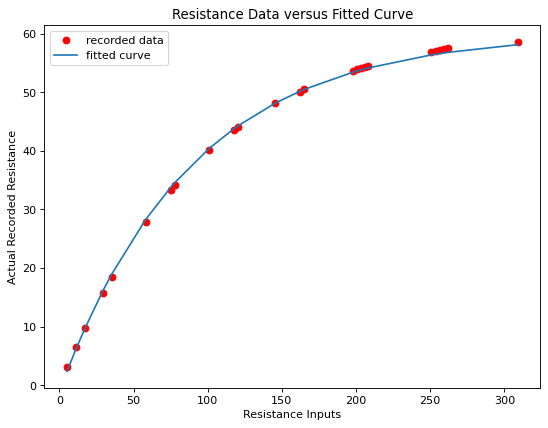

In [7]:
figure(figsize=(8, 6), dpi=80)
plt.scatter(data_inputs, data_outputs, label ="recorded data", c="r")
plt.plot(data_inputs, func(data_inputs, *popt), label="fitted curve")
plt.xlabel("Resistance Inputs")
plt.ylabel("Actual Recorded Resistance")
plt.title("Resistance Data versus Fitted Curve")
plt.legend()
plt.show()

In [8]:
#measuring goodness of fit using mean squared error
np.sum((data_outputs-func(data_inputs, *popt))**2)/data.shape[0]

0.15468548387616912

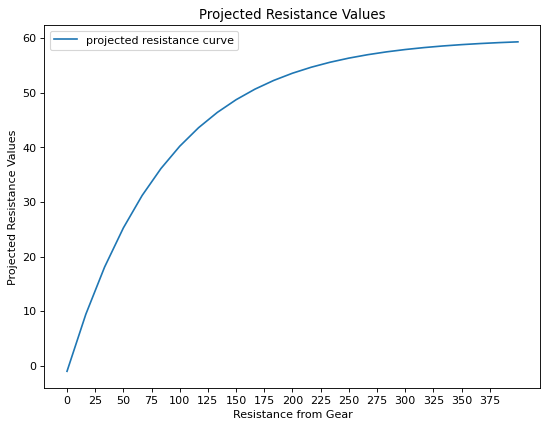

In [9]:
inputs=np.linspace(0,400,25)
figure(figsize=(8, 6), dpi=80)
plt.plot(inputs, func(inputs,*popt), label="projected resistance curve")
plt.xlabel("Resistance from Gear")
plt.xticks(np.arange(0,400,step=25))
plt.ylabel("Projected Resistance Values")
plt.title("Projected Resistance Values")
plt.legend()
plt.show()

In [10]:
#estimated parameter values
print("a:{:.3f}, b:{:.3f}, c:{:.3f}".format(popt[0], popt[1], popt[2]))

a:-92.799, b:0.011, c:-37.234
